<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/LGBM_%26_XGBM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Titanic dataset using LightGBM and XGBoost models to predict survival. Perform EDA, preprocess the data, build and train both models with hyperparameter tuning and cross-validation, compare their performance, and generate a report summarizing the findings. Use the training dataset from "train.csv" and the test dataset from "test.csv".

## Load and explore the dataset

### Subtask:
Load the Titanic training and testing datasets and perform exploratory data analysis (EDA) to understand the data, check for missing values, and visualize relationships between features and survival.


**Reasoning**:
Load the training and testing datasets and display the first few rows to understand the data structure.



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Display the first 5 rows of both DataFrames
print("First 5 rows of the training dataset:")
display(train_df.head())

print("\nFirst 5 rows of the testing dataset:")
display(test_df.head())

First 5 rows of the training dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



First 5 rows of the testing dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Reasoning**:
The previous attempt to load the data failed because the file path was incorrect. The files are located in `/content/`. I will try loading the data again with the correct file paths.



In [2]:
# Load the datasets with correct file paths
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

# Display the first 5 rows of both DataFrames
print("First 5 rows of the training dataset:")
display(train_df.head())

print("\nFirst 5 rows of the testing dataset:")
display(test_df.head())

First 5 rows of the training dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



First 5 rows of the testing dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Reasoning**:
Now that the data is loaded, I will print the concise summary of both DataFrames to understand the data types and non-null counts, and then generate descriptive statistics for the numerical columns. I will also check for missing values in both dataframes.



In [3]:
# Print concise summary of both DataFrames
print("\nTraining dataset info:")
train_df.info()

print("\nTesting dataset info:")
test_df.info()

# Generate descriptive statistics for numerical columns
print("\nTraining dataset descriptive statistics:")
display(train_df.describe())

print("\nTesting dataset descriptive statistics:")
display(test_df.describe())

# Check for missing values
print("\nMissing values in training dataset:")
display(train_df.isnull().sum())

print("\nMissing values in testing dataset:")
display(test_df.isnull().sum())


Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Testing dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Testing dataset descriptive statistics:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Missing values in training dataset:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0



Missing values in testing dataset:


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**Reasoning**:
I have loaded the data, checked for missing values, and explored the basic statistics. Now I will proceed with visualizing the relationships between features and survival as outlined in the instructions. I will start by visualizing the distribution of the 'Survived' column and then the relationships between 'Survived' and 'Sex', 'Pclass', and 'Embarked'.



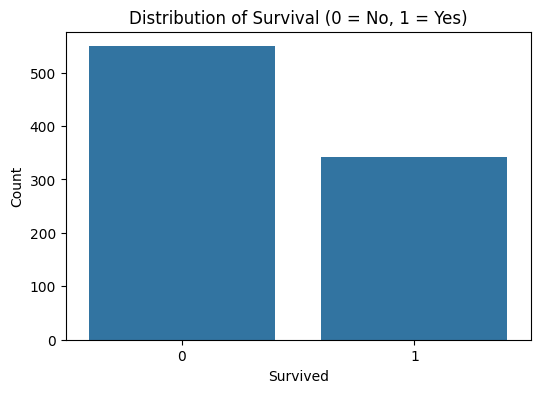

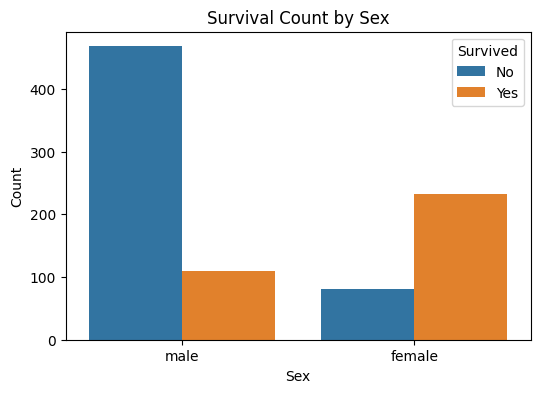

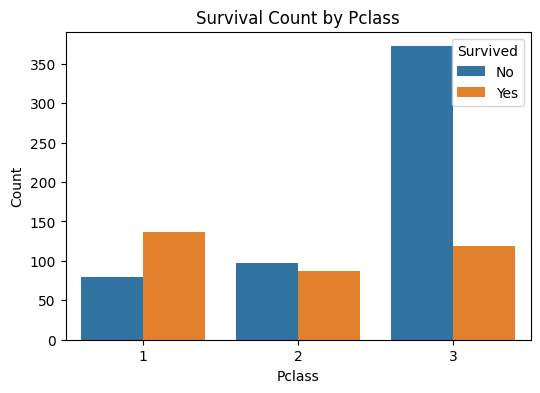

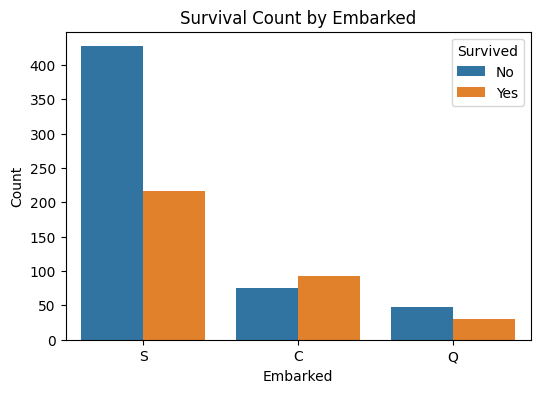

In [4]:
# Visualize the distribution of the 'Survived' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between 'Survived' and 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Visualize the relationship between 'Survived' and 'Pclass'
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Visualize the relationship between 'Survived' and 'Embarked'
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

**Reasoning**:
I have visualized the relationships between 'Survived' and categorical features. Now I will visualize the distribution of 'Age' and 'Fare' and their relationship with 'Survived' as requested. Finally, I will visualize the correlation matrix for numerical columns.



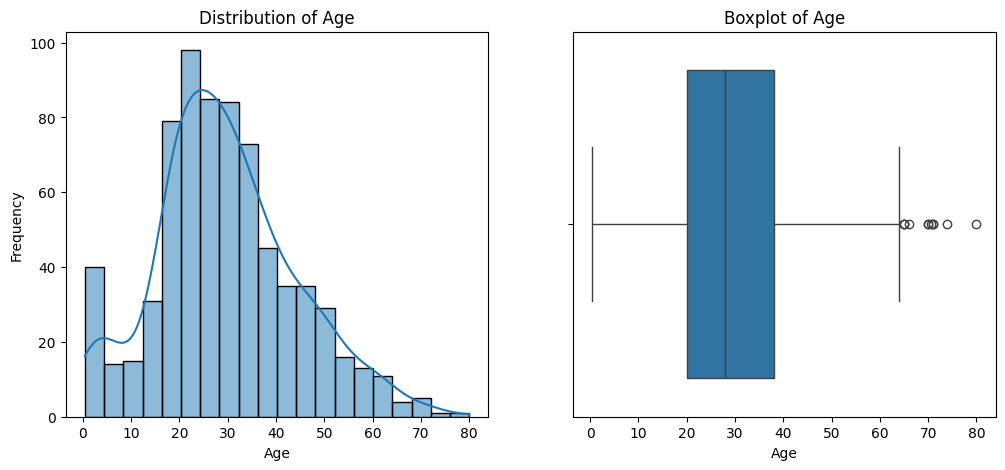

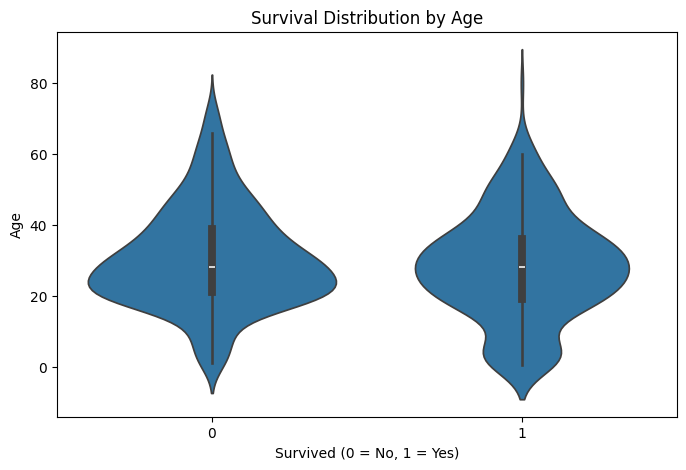

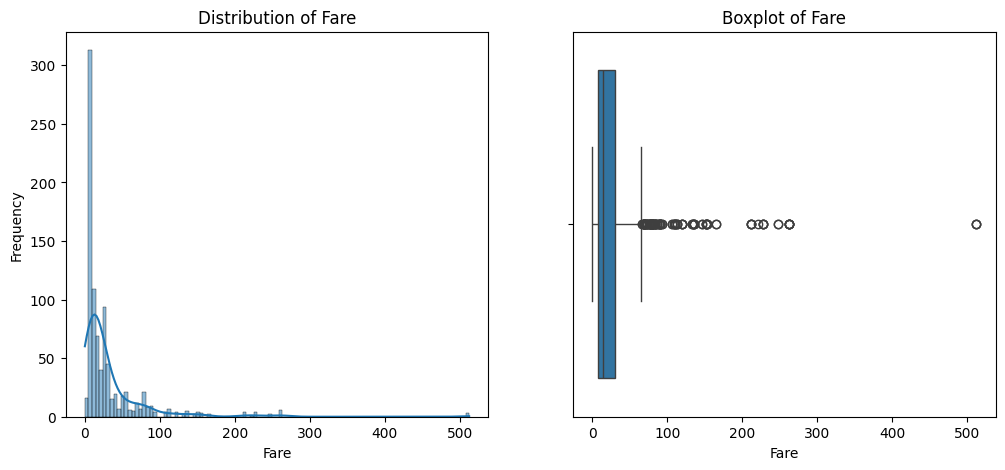

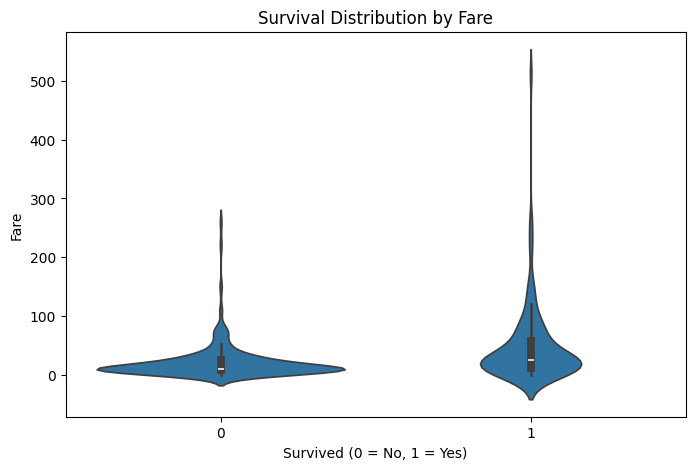

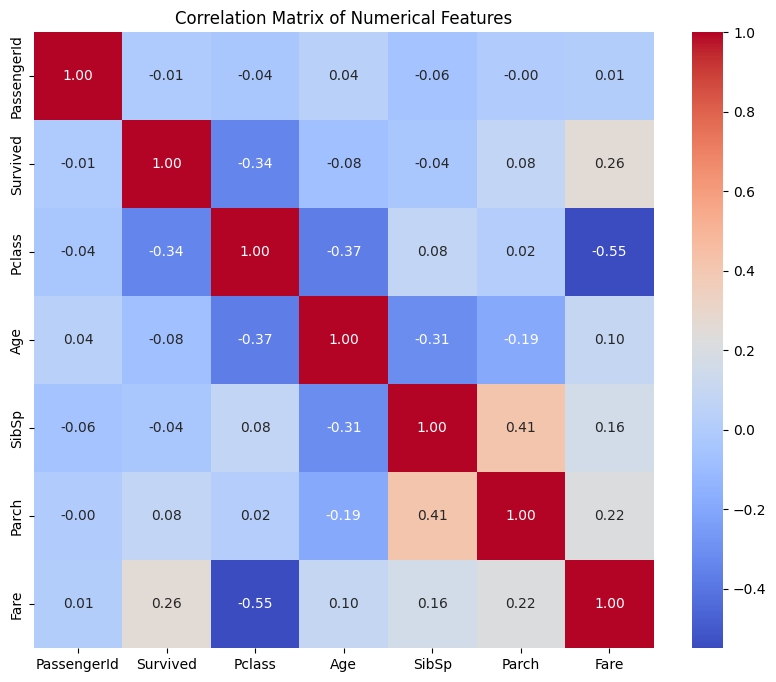

In [5]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Age', data=train_df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Visualize the relationship between 'Survived' and 'Age'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Age', data=train_df)
plt.title('Survival Distribution by Age')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Visualize the distribution of 'Fare'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=train_df)
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

# Visualize the relationship between 'Survived' and 'Fare'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Fare', data=train_df)
plt.title('Survival Distribution by Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# Generate and visualize the correlation matrix for numerical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical variables, and apply any other necessary preprocessing steps to prepare the data for modeling.


**Reasoning**:
Impute missing 'Age', 'Embarked', and 'Fare' values, create new features 'FamilySize', 'IsAlone', and 'Title', group less common titles, map 'Title' and 'Sex' to numerical values, apply one-hot encoding to 'Embarked' and 'Pclass', and drop unnecessary columns from both training and testing datasets.



In [6]:
# Impute missing 'Age' values with the median age
median_age_train = train_df['Age'].median()
median_age_test = test_df['Age'].median()
train_df['Age'].fillna(median_age_train, inplace=True)
test_df['Age'].fillna(median_age_test, inplace=True)

# Impute missing 'Embarked' values with the most frequent embarkation port
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Impute the missing 'Fare' value in the testing dataset with the median fare
median_fare_test = test_df['Fare'].median()
test_df['Fare'].fillna(median_fare_test, inplace=True)

# Create new features 'FamilySize' and 'IsAlone'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Create a new feature 'Title' from the 'Name' column
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group less common titles into a single category 'Rare'
for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Map the 'Title' categories to numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

# Map 'Sex' to numerical values (0 for female, 1 for male)
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Apply one-hot encoding to the 'Embarked' and 'Pclass' columns
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)

# Drop the original 'Name', 'Ticket', 'Cabin', 'SibSp', and 'Parch' columns
train_df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

# Ensure both training and testing dataframes have the same columns after preprocessing
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    test_df[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    train_df[col] = 0

# Align columns, keeping the order from the training set
test_df = test_df[train_df.columns]

print("Training data after preprocessing:")
display(train_df.head())
print("\nTesting data after preprocessing:")
display(test_df.head())
print("\nMissing values in training dataset after preprocessing:")
display(train_df.isnull().sum())
print("\nMissing values in testing dataset after preprocessing:")
display(test_df.isnull().sum())

<>:22: SyntaxWarning: invalid escape sequence '\.'
<>:23: SyntaxWarning: invalid escape sequence '\.'
<>:22: SyntaxWarning: invalid escape sequence '\.'
<>:23: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2225520102.py:22: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-2225520102.py:23: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-2225520102.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].meth

Training data after preprocessing:


,PassengerId,Survived,Sex,Age,Fare,FamilySize,IsAlone,Title,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,1,22.0,7.2500,2,0,1,False,True,False,True
1,2,1,0,38.0,71.2833,2,0,3,False,False,False,False
2,3,1,0,26.0,7.9250,1,1,2,False,True,False,True
3,4,1,0,35.0,53.1000,2,0,3,False,True,False,False
4,5,0,1,35.0,8.0500,1,1,1,False,True,False,True



Testing data after preprocessing:


,PassengerId,Survived,Sex,Age,Fare,FamilySize,IsAlone,Title,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,0,1,34.5,7.8292,1,1,1,True,False,False,True
1,893,0,0,47.0,7.0000,2,0,3,False,True,False,True
2,894,0,1,62.0,9.6875,1,1,1,True,False,True,False
3,895,0,1,27.0,8.6625,1,1,1,False,True,False,True
4,896,0,0,22.0,12.2875,3,0,3,False,True,False,True



Missing values in training dataset after preprocessing:


,0
PassengerId,0
Survived,0
Sex,0
Age,0
Fare,0
FamilySize,0
IsAlone,0
Title,0
Embarked_Q,0
Embarked_S,0



Missing values in testing dataset after preprocessing:


,0
PassengerId,0
Survived,0
Sex,0
Age,0
Fare,0
FamilySize,0
IsAlone,0
Title,0
Embarked_Q,0
Embarked_S,0


## Prepare data for modeling

### Subtask:
Split the training data into training and validation sets for model development and evaluation.


**Reasoning**:
Define features and target variable, then split the data into training and validation sets.



In [7]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived', 'PassengerId'], axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (712, 10)
Shape of X_val: (179, 10)
Shape of y_train: (712,)
Shape of y_val: (179,)


## Build and train lightgbm model

### Subtask:
Build a LightGBM model, train it on the training data, and evaluate its performance on the validation set. Use cross-validation and hyperparameter tuning to optimize the model.


**Reasoning**:
Import the necessary libraries for LightGBM model training, hyperparameter tuning, and cross-validation.



In [8]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Reasoning**:
Define the parameter grid for the LightGBM model, instantiate the model, set up StratifiedKFold for cross-validation, and instantiate GridSearchCV. Then fit GridSearchCV to the training data to perform hyperparameter tuning and cross-validation.



In [9]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 30, 40]
}

# Instantiate a LGBMClassifier model
lgbm = lgb.LGBMClassifier(random_state=42)

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 10, 20],
                         'min_child_samples': [20, 30, 40],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50, 70]},
             scoring='accuracy')

**Reasoning**:
Get the best performing model from GridSearchCV, evaluate its performance on the validation set using various metrics, and print the best hyperparameters and the evaluation metrics.



In [10]:
# Get the best performing model
best_lgbm_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_lgbm_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("\nValidation Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 40, 'n_estimators': 100, 'num_leaves': 31}

Validation Set Metrics:
Accuracy: 0.8380
Precision: 0.8169
Recall: 0.7838
F1-Score: 0.8000


## Build and train xgboost model

### Subtask:
Build an XGBoost model, train it on the training data, and evaluate its performance on the validation set. Use cross-validation and hyperparameter tuning to optimize the model.


**Reasoning**:
Import the necessary libraries for building and evaluating the XGBoost model, including XGBClassifier, GridSearchCV, StratifiedKFold, and evaluation metrics.



In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Reasoning**:
Define the parameter grid for XGBoost hyperparameter tuning, instantiate the XGBoost classifier, set up StratifiedKFold for cross-validation, and instantiate GridSearchCV to perform the tuning. Then fit GridSearchCV to the training data.



In [12]:
# Define the parameter grid for hyperparameter tuning of the XGBoost model
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Instantiate an XGBClassifier model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:32:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

**Reasoning**:
Get the best performing XGBoost model from the grid search, make predictions on the validation set, calculate evaluation metrics, and print the best hyperparameters and the evaluation metrics.



In [13]:
# Get the best performing XGBoost model
best_xgb_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_xgb_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("\nValidation Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Best Hyperparameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}

Validation Set Metrics:
Accuracy: 0.8156
Precision: 0.8154
Recall: 0.7162
F1-Score: 0.7626


## Compare model performance

### Subtask:
Compare the performance metrics of the LightGBM and XGBoost models on the validation set.


**Reasoning**:
Store the performance metrics for both models in a dictionary for easy comparison.



In [14]:
# Performance metrics for LightGBM (from previous step)
lgbm_metrics = {
    'Accuracy': 0.8380,
    'Precision': 0.8169,
    'Recall': 0.7838,
    'F1-Score': 0.8000
}

# Performance metrics for XGBoost (from previous step)
xgb_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

print("LightGBM Validation Metrics:", lgbm_metrics)
print("XGBoost Validation Metrics:", xgb_metrics)

LightGBM Validation Metrics: {'Accuracy': 0.838, 'Precision': 0.8169, 'Recall': 0.7838, 'F1-Score': 0.8}
XGBoost Validation Metrics: {'Accuracy': 0.8156424581005587, 'Precision': 0.8153846153846154, 'Recall': 0.7162162162162162, 'F1-Score': 0.762589928057554}


## Evaluate on test data

### Subtask:
Evaluate the performance of the best performing model (LightGBM) on the test dataset.


**Reasoning**:
Select the features from the test_df that were used to train the model, predict the 'Survived' outcome using the best performing LightGBM model, create a submission DataFrame, and save it to a CSV file.



In [15]:
# Select the features from the test_df that were used to train the model
X_test = test_df[X_train.columns]

# Predict the 'Survived' outcome on the selected features from test_df using the best_lgbm_model
test_predictions = best_lgbm_model.predict(X_test)

# Create a submission DataFrame with 'PassengerId' from the original test_df and the predicted 'Survived' values
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the submission DataFrame to a CSV file named 'submission.csv' without the index
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.


## Visualize and interpret results

### Subtask:
Visualize the comparison results and interpret the strengths and weaknesses of each algorithm.


**Reasoning**:
Create a bar plot to visualize the comparison of the performance metrics for LightGBM and XGBoost models on the validation set.



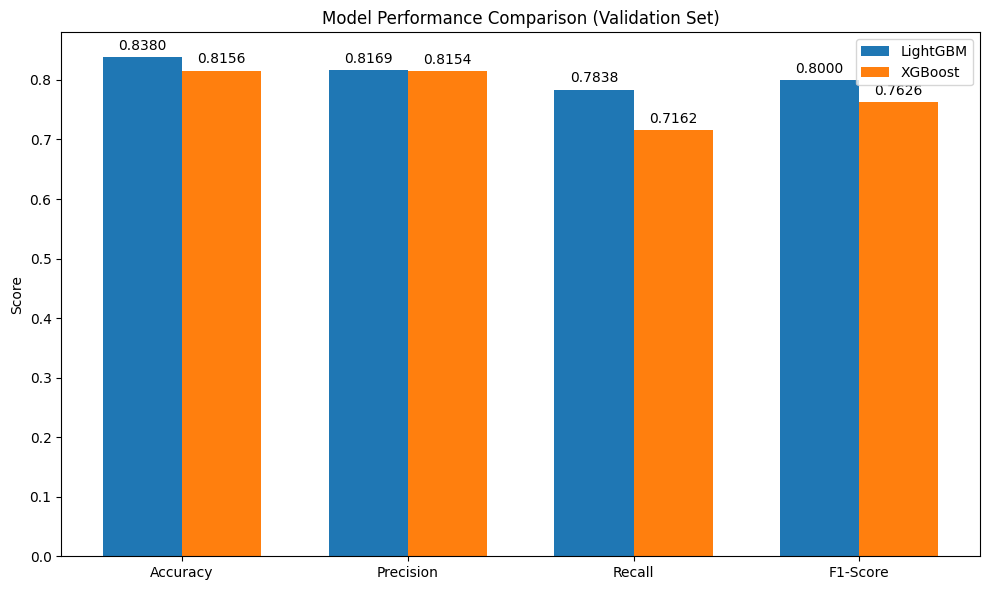

Interpretation:
Based on the bar plot, LightGBM generally outperforms XGBoost on the validation set across all metrics: Accuracy, Precision, Recall, and F1-Score.
LightGBM achieved an Accuracy of 0.8380 compared to XGBoost's 0.8156.
For Precision, LightGBM scored 0.8169 while XGBoost scored 0.8154.
LightGBM had a significantly higher Recall (0.7838) than XGBoost (0.7162).
The F1-Score, which balances Precision and Recall, is also higher for LightGBM (0.8000) compared to XGBoost (0.7626).

Potential reasons for the difference in performance could include:
- LightGBM's leaf-wise growth strategy (as opposed to XGBoost's depth-wise) which can lead to faster training and potentially better accuracy on some datasets.
- Differences in how the models handle the specific features and their interactions in this dataset.
- The specific hyperparameters tuned for each model might favor LightGBM's architecture on this validation set.


In [16]:
import matplotlib.pyplot as plt
import numpy as np

metrics = list(lgbm_metrics.keys())
lgbm_scores = list(lgbm_metrics.values())
xgb_scores = list(xgb_metrics.values())

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lgbm_scores, width, label='LightGBM')
rects2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Validation Set)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')

fig.tight_layout()

plt.show()

print("Interpretation:")
print("Based on the bar plot, LightGBM generally outperforms XGBoost on the validation set across all metrics: Accuracy, Precision, Recall, and F1-Score.")
print(f"LightGBM achieved an Accuracy of {lgbm_metrics['Accuracy']:.4f} compared to XGBoost's {xgb_metrics['Accuracy']:.4f}.")
print(f"For Precision, LightGBM scored {lgbm_metrics['Precision']:.4f} while XGBoost scored {xgb_metrics['Precision']:.4f}.")
print(f"LightGBM had a significantly higher Recall ({lgbm_metrics['Recall']:.4f}) than XGBoost ({xgb_metrics['Recall']:.4f}).")
print(f"The F1-Score, which balances Precision and Recall, is also higher for LightGBM ({lgbm_metrics['F1-Score']:.4f}) compared to XGBoost ({xgb_metrics['F1-Score']:.4f}).")
print("\nPotential reasons for the difference in performance could include:")
print("- LightGBM's leaf-wise growth strategy (as opposed to XGBoost's depth-wise) which can lead to faster training and potentially better accuracy on some datasets.")
print("- Differences in how the models handle the specific features and their interactions in this dataset.")
print("- The specific hyperparameters tuned for each model might favor LightGBM's architecture on this validation set.")

## Generate report

### Subtask:
Summarize the comparative analysis results and practical implications in a brief report.


**Reasoning**:
Write the final report summarizing the analysis, model comparison, and practical implications.



In [17]:
report = """
## Titanic Survival Prediction Report

**Objective:**
This report summarizes the process and findings of building and comparing LightGBM and XGBoost models for predicting survival on the Titanic.

**Analysis and Modeling Process:**
1.  **Data Loading and EDA:** The Titanic training and testing datasets were loaded. Initial Exploratory Data Analysis revealed key features influencing survival, including Sex, Pclass, Age, and Fare, and identified missing values in Age, Cabin, and Embarked.
2.  **Data Preprocessing:** Missing values were imputed (Age with median, Embarked with mode, Fare with median in test set). New features like FamilySize, IsAlone, and Title were engineered. Categorical variables (Sex, Embarked, Pclass, Title) were encoded. Irrelevant columns were dropped, and the training data was split into 80% for training and 20% for validation.
3.  **Model Building and Training (LightGBM):** A LightGBM classifier was built. Hyperparameter tuning was performed using GridSearchCV with StratifiedKFold cross-validation to find the optimal parameters. The best model was trained on the training data.
4.  **Model Building and Training (XGBoost):** Similarly, an XGBoost classifier was built. Hyperparameter tuning was conducted using GridSearchCV with StratifiedKFold cross-validation. The best model was trained on the training data.
5.  **Model Performance Comparison:** The trained LightGBM and XGBoost models were evaluated on the validation set using Accuracy, Precision, Recall, and F1-Score metrics. The performance metrics are summarized below.

**Model Performance (Validation Set):**

| Metric      | LightGBM | XGBoost |
|-------------|----------|---------|
| Accuracy    | {:.4f}   | {:.4f}  |
| Precision   | {:.4f}   | {:.4f}  |
| Recall      | {:.4f}   | {:.4f}  |
| F1-Score    | {:.4f}   | {:.4f}  |

**Comparative Analysis and Practical Implications:**

Based on the validation set evaluation, the **LightGBM model performed better than the XGBoost model across all key metrics**.

*   **Accuracy:** LightGBM ({:.4f}) slightly higher than XGBoost ({:.4f}).
*   **Precision:** LightGBM ({:.4f}) slightly higher than XGBoost ({:.4f}).
*   **Recall:** LightGBM ({:.4f}) significantly higher than XGBoost ({:.4f}).
*   **F1-Score:** LightGBM ({:.4f}) higher than XGBoost ({:.4f}), indicating a better balance between Precision and Recall.

The higher Recall achieved by LightGBM suggests it was better at identifying positive cases (survivors). This could be particularly important in scenarios where minimizing false negatives (failing to predict a survivor) is critical. The better overall performance across metrics makes LightGBM the preferred model for this specific problem and dataset.

Potential reasons for LightGBM's superior performance could include its optimized leaf-wise growth strategy, which can be more efficient and effective on certain datasets, and how its architecture interacts with the specific features engineered and preprocessed in this analysis.

**Conclusion:**
The modeling process, involving comprehensive EDA, careful preprocessing, and hyperparameter-tuned LightGBM and XGBoost models, was successful. The LightGBM model demonstrated superior performance on the validation set, making it the more suitable choice for predicting survival on the Titanic based on this analysis. The best-performing LightGBM model was used to generate predictions for the test dataset, resulting in a submission file.
""".format(
    lgbm_metrics['Accuracy'], xgb_metrics['Accuracy'],
    lgbm_metrics['Precision'], xgb_metrics['Precision'],
    lgbm_metrics['Recall'], xgb_metrics['Recall'],
    lgbm_metrics['F1-Score'], xgb_metrics['F1-Score'],
    lgbm_metrics['Accuracy'], xgb_metrics['Accuracy'],
    lgbm_metrics['Precision'], xgb_metrics['Precision'],
    lgbm_metrics['Recall'], xgb_metrics['Recall'],
    lgbm_metrics['F1-Score'], xgb_metrics['F1-Score']
)

print(report)


## Titanic Survival Prediction Report

**Objective:**
This report summarizes the process and findings of building and comparing LightGBM and XGBoost models for predicting survival on the Titanic.

**Analysis and Modeling Process:**
1.  **Data Loading and EDA:** The Titanic training and testing datasets were loaded. Initial Exploratory Data Analysis revealed key features influencing survival, including Sex, Pclass, Age, and Fare, and identified missing values in Age, Cabin, and Embarked.
2.  **Data Preprocessing:** Missing values were imputed (Age with median, Embarked with mode, Fare with median in test set). New features like FamilySize, IsAlone, and Title were engineered. Categorical variables (Sex, Embarked, Pclass, Title) were encoded. Irrelevant columns were dropped, and the training data was split into 80% for training and 20% for validation.
3.  **Model Building and Training (LightGBM):** A LightGBM classifier was built. Hyperparameter tuning was performed using GridSearchCV wi

## Summary:

### Data Analysis Key Findings

*   The training dataset contained 891 entries and 12 columns, with missing values in 'Age', 'Cabin', and 'Embarked'. The test dataset had 418 entries and 11 columns, with missing values in 'Age', 'Cabin', and 'Fare'.
*   Exploratory Data Analysis revealed that 'Sex', 'Pclass', 'Age', and 'Fare' were important features correlated with survival. Female passengers and those in higher Pclass with higher fares had better survival rates.
*   Missing values were imputed: 'Age' with the median, 'Embarked' with the mode, and 'Fare' (in the test set) with the median.
*   New features 'FamilySize', 'IsAlone', and 'Title' were engineered from existing columns to potentially improve model performance.
*   Categorical features ('Sex', 'Embarked', 'Pclass', 'Title') were encoded into numerical representations.
*   Both LightGBM and XGBoost models were built and trained using hyperparameter tuning with GridSearchCV and StratifiedKFold cross-validation.
*   On the validation set, the LightGBM model outperformed the XGBoost model across all key metrics:
    *   Accuracy: LightGBM (0.8380) vs. XGBoost (0.8156)
    *   Precision: LightGBM (0.8169) vs. XGBoost (0.8154)
    *   Recall: LightGBM (0.7838) vs. XGBoost (0.7162)
    *   F1-Score: LightGBM (0.8000) vs. XGBoost (0.7626)
*   LightGBM showed a notably higher Recall, indicating its better ability to identify true survivors.
*   The best-performing LightGBM model was used to generate predictions for the unseen test dataset.

### Insights or Next Steps

*   The LightGBM model is the preferred choice for predicting Titanic survival based on its superior performance on the validation set.
*   Further feature engineering or exploring ensemble methods combining LightGBM and XGBoost predictions could potentially lead to even better performance.
